In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
!pip install seaborn -q

In [ ]:
df = pd.read_csv('Customer-Value-Analysis.csv')

In [74]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-12-02,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-03-02,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [75]:
df.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [ ]:
# Checking for the numerical and categorical variable 
num_cols_count = len(df.select_dtypes(include=['number']).columns)
cate_cols = df.select_dtypes(include=['object']).columns
print(f'Number of numeric columns: {num_cols_count}')
print(f'Number of categorical columns: {len(cate_cols)}')

# 1. Data Cleaning 

In [ ]:
df.duplicated().sum()

No Duplicate and NUll values in the dataset

### Type Casting Attributes

In [ ]:
df.info()

In [ ]:
# Formatting date of Effective to Date
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce')

In [ ]:
df.info()

## Checking for Outliers

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

In [ ]:
df[num_cols].boxplot(
            notch=True,
            boxprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2),
            vert=False,
            grid=True
)

plt.title('Outlier Detecting of the numeric columns')
plt.xticks(rotation=70)
plt.xlabel('values')
plt.show()

## Columns with possible outliers from the previous plot

In [ ]:
cols=['Total Claim Amount', 'Number of Policies', 'Monthly Premium Auto', 'Number of Open Complaints']
    
df[cols].boxplot(            
                notch=True,
                boxprops=dict(color='blue'),
                medianprops=dict(color='red', linewidth=2),
                vert=False,                                                        
                grid=True)
plt.title('Outlier Detecting of the certain numeric columns')
plt.xticks(rotation=70)
plt.xlabel('values')
plt.show()

In [ ]:
df['Number of Open Complaints'].unique()

In [ ]:
df['Monthly Premium Auto'].unique()

In [ ]:
df['Number of Policies'].unique()

In [ ]:
df['Total Claim Amount'].unique()

# EDA

### 1. Uni-Variate Analysis

In [ ]:
cate_val = df.select_dtypes(include=['object'])
cate_val.describe().T

In [ ]:
num_val = df.select_dtypes(include=['number'])
num_val.describe().T

In [ ]:
corr_coef, p = stats.pearsonr(df['Monthly Premium Auto'], df['Total Claim Amount'])

print(f'Correlation Coefficient: {corr_coef}, p value: {p}')

In [ ]:
corr_matrix = num_val.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

In [ ]:
plt.scatter(df['Monthly Premium Auto'], df['Total Claim Amount'])

In [ ]:
plt.scatter(df['Customer Lifetime Value'],df['Income'])


In [ ]:
plt.scatter(df['Number of Policies'], df['Customer Lifetime Value'])

In [ ]:
sns.countplot(x='Number of Policies', data=df)

People mostly like having one policy or 2 policies. Maybe it has demand or more engagement.

### Target Variable Analysis

In [ ]:
stats.probplot(df['Customer Lifetime Value'], plot = plt, dist='expon')
plt.title('Quantile-Quantile plot')

Data doesn't follow distribution.

In [ ]:
sns.histplot(df['Customer Lifetime Value'], kde=True, bins=20)

It is right-skewed

In [ ]:
df['Customer Lifetime Value'].plot.box(vert=False)

Seems to have outliers

## Hypothesis testing

* Null Hypothesis: The data is Normally distributed
* Alternative Hypothesis: The data is not normally distributed

In [ ]:
statistic, p_value = stats.kstest(df['Customer Lifetime Value'], 'norm')

print(f"KS statistic: {statistic}, p-value: {p_value}")


* A p-value of 0.0 means that the null hypothesis is rejected, so CLV data does not follow a normal distribution. 
* KS statistics being 1.0 means the empirical distribution and theoretical distribution are completely different at some point. Means the data doesn't resemble a normal distribution at all. 

In [78]:
anova = []
manwhitney = []

for column in cate_cols:
    #print(column)
    if df[column].nunique() > 2:
        anova.append(column)
    else:
        manwhitney.append(column)
  
print(f'Columns for ANOVA test:', anova)        
print(f'Columns for MANWHITNEY test:', manwhitney)


Columns for ANOVA test: ['Customer', 'State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Columns for MANWHITNEY test: ['Response', 'Gender']


## Response:
* Null Hypothesis: The distribution of CLV does not differ significantly between the two response groups.
* Alternative Hypothesis: The distribution of CLV differs significantly between the two response groups.

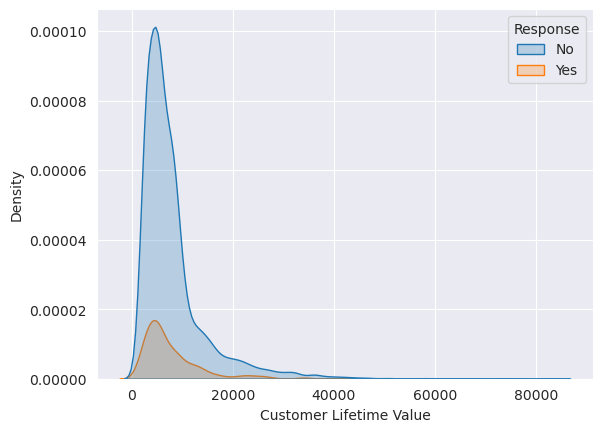

In [82]:
sns.kdeplot(data=df, x='Customer Lifetime Value', hue='Response', fill=True)
plt.show()

* There is a high peak of 'NO' for lower Customer Lifetime Value

### Manwhitney test for 'Response'

In [84]:
yes = df[df['Response'] == 'Yes']['Customer Lifetime Value']
no = df[df['Response'] == 'No']['Customer Lifetime Value']

manwhitney_test = stats.mannwhitneyu(yes, no)
print(f'Manwhitney statistic: {manwhitney_test}')

Manwhitney statistic: MannwhitneyuResult(statistic=5060988.0, pvalue=0.5168872245291198)


### This means there is no statistically significant difference in the Customer Lifetime Value  between two customer response groups.Fails to reject the null hypothesis

### Gender 
* Null Hypothesis: The distribution of ClV does not differ significantly between the two gender groups.
* Alternative Hypothesis: The distribution of CLV differs significantly between the two gender groups.

### KDE Plot 

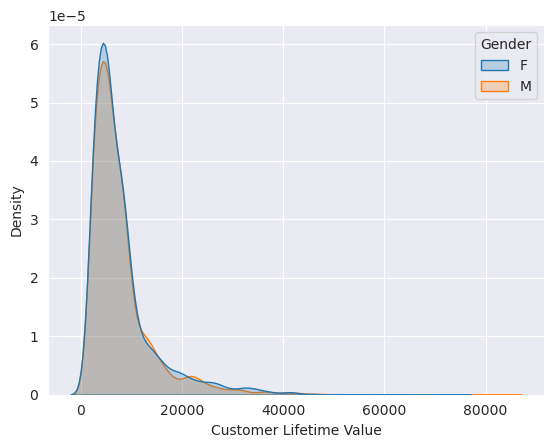

In [85]:
sns.kdeplot(data=df, x='Customer Lifetime Value', hue='Gender', fill=True)
plt.show()

### Manwhitney test for Gender

In [87]:
male = df[df['Gender'] == 'M']['Customer Lifetime Value']
female = df[df['Gender'] == 'F']['Customer Lifetime Value']

manwhitney_test = stats.mannwhitneyu(male, female)
print(f'Manwhitney statistic: {manwhitney_test}')

Manwhitney statistic: MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


Gender has no significant impact on CLV. The distribution of CLv for different gender groups are statistically similar.

### State 

* Null Hypothesis: The group has the same mean ranks.
* Alternative Hypothesis: The groups do not have the same mean ranks.

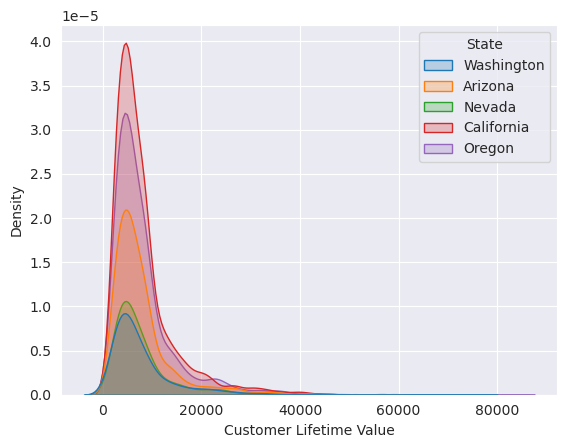

In [88]:
sns.kdeplot(data=df, x='Customer Lifetime Value', hue='State', fill=True)
plt.show()

## kruskal test

In [89]:
washington = df[df['State'] == 'Washington']['Customer Lifetime Value']
arizona = df[df['State'] == 'Arizona']['Customer Lifetime Value']
nevada = df[df['State'] == 'Nevada']['Customer Lifetime Value']
california = df[df['State'] == 'California']['Customer Lifetime Value']
oregon = df[df['State'] == 'Oregon']['Customer Lifetime Value']

state = stats.kruskal(washington, arizona, nevada, california, oregon)
state

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)

The groups are statistically similar in terms of their ranks.

In [90]:
anova_state = stats.f_oneway(washington, arizona, nevada, california, oregon)
anova_state

F_onewayResult(statistic=0.27289285462119306, pvalue=0.8955985932127517)